In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib

In [ ]:

import pandas as pd
df = pd.read_excel("SpendingData.xlsx")
df.head()

,Index,Your age(in completed years):,Gender,Are you an earning individual?,Are you a resident of Mumbai?,Where do you live?,What is your employment status?,Which of these describes your personal income per annum (in lakh) ?,[How do you divide your income in the following terms? (in percentage)] Essentials,[How do you divide your income in the following terms? (in percentage)] Non-essentials,[How do you divide your income in the following terms? (in percentage)] Savings,How do you like to dissect your discretionary income (income that is left after spending on your basic necessities)?,What is your most preferred way of investing ?,What is your most preferred way of saving ?,How has the pandemic affected you?,In which category have your expenses increased the most during the pandemic?,In which category have your expenses decreased the most during the pandemic?,Exhaustion of your savings since the pandemic is __________,How did your last month’s expense vary from your average monthly expense?,[Make your choice] Your savings are exhausted easily,[Make your choice] Your monthly expenses exceed your monthly income,[Make your choice] You are satisfied with your spending pattern,[Make your choice] Your monthly expenses match your budgeting plan,"If your income increased by 10% , how would you utilize it?","If your income decreased by 10% , how would you compensate for it?","If you have to make a major purchase, how would you do it?"
0,1,56,Male,Yes,Yes,Mumbai city,Own business,below 2.5 lakhs,0.4,0.3,Se,Save the money,None,"Precious collectibles(Eg.: gold,silver)",Pay cut,Education,Transportation,Less than before,Decrease,Agree,Strongly Agree,Disagree,Strongly Disagree,Save more,Utilize savings,Take loan/Mortgage
1,4,43,Female,Yes,Yes,Mumbai city,Part time employed,below 2.5 lakhs,0.5,0.1,0.4,Save the money,Nonr,Fixed deposits,Pay cut,Others,Recreation,Less than before,Decrease,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Save more,Cut back expenses,Withdraw from savings
2,6,20,Female,Yes,Yes,Mumbai suburban,Self-employed/Freelancer,below 2.5 lakhs,0.5,0.3,0.2,Partially save and partially invest,Mutual Funds,Fixed deposits,Job loss,Insurance/Healthcare,Recreation,More than before,No change,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Save more,Cut back expenses,Withdraw from savings
3,7,32,Female,Yes,Yes,Mumbai city,Full time employed,7.5 - 10 lakhs,0.4,0.4,0.2,Partially save and partially invest,Government securities,Insurance and annuities,Pay cut,Recreation,Rent/Maintenance,More than before,No change,Neutral,Disagree,Neutral,Disagree,Save more,Cut back expenses,Withdraw from savings
4,8,48,Female,Yes,Yes,Mumbai suburban,Full time employed,5 - 7.5 lakhs,0.4,0.3,0.3,Save the money,None,Insurance and annuities,Pay cut,Insurance/Healthcare,Insurance/Healthcare,More than before,No change,Agree,Disagree,Agree,Agree,Save more,Cut back expenses,Take loan/Mortgage


In [ ]:
df.iloc[2,1]

20

In [ ]:
del df['Index']   #unnecessary column deleted
#del df['total percentage'] 


In [ ]:
#giving short column names
df.columns = ['age','gender','earning','resident','region','employment','salary','essential','non-essential','savings',
              'discretionary_income','investments_type','savings_type','pandemic_job','incr_expense','decr_expense','exhaustion_savings',
              'last_month_exp_change','Your savings are exhausted easily','Your monthly expenses exceed your monthly income',
              'You are satisfied with your spending pattern','Your monthly expenses match your budgeting plan',
              'income_incr','income_decr','major_purchase']

In [ ]:
df['investments_type'].value_counts()

Mutual Funds                         21
None                                 13
Government securities                 6
Building portfolios(stock market)     5
Real estate investing                 4
Nonr                                  1
gold & investment policies            1
Stock Derivatives                     1
Name: investments_type, dtype: int64

In [ ]:
#replacing user-typed responses with other 
df['investments_type'] = df['investments_type'].replace({'Stock Derivatives':'other', 'Nonr': 'None', 
                            'gold & investment policies': 'other'})

In [ ]:
df['investments_type'].value_counts()

Mutual Funds                         21
None                                 14
Government securities                 6
Building portfolios(stock market)     5
Real estate investing                 4
other                                 2
Name: investments_type, dtype: int64

In [ ]:
df['savings_type'].value_counts()

Fixed deposits                             20
Insurance and annuities                    10
Precious collectibles(Eg.: gold,silver)     5
None                                        5
Other                                       5
Banking                                     1
Provident fund                              1
MF                                          1
PPF, EPF                                    1
Mf                                          1
Deposit in bank                             1
Crypto, Stocks                              1
Name: savings_type, dtype: int64

In [ ]:
#replacing user-typed responses with other 
df['savings_type'] = df['savings_type'].replace({'MF':'Other','Crypto, Stocks ':'Other','Mf': 'Other',
                      'PPF, EPF': 'Other','Deposit in bank':'Other','Provident fund': 'Other','Banking':'Other' })

In [ ]:
df['savings_type'].value_counts()

Fixed deposits                             20
Other                                      12
Insurance and annuities                    10
None                                        5
Precious collectibles(Eg.: gold,silver)     5
Name: savings_type, dtype: int64

In [ ]:
#filling null values with zero
df['essential'].fillna(0,inplace= True)
df['non-essential'].fillna(0,inplace= True)
df['savings'].fillna(0,inplace= True)

In [ ]:
df['major_purchase'].value_counts()

Withdraw from savings    38
Take loan/Mortgage       13
Borrow from others        1
Name: major_purchase, dtype: int64

In [ ]:
df

,age,gender,earning,resident,region,employment,salary,essential,non-essential,savings,discretionary_income,investments_type,savings_type,pandemic_job,incr_expense,decr_expense,exhaustion_savings,last_month_exp_change,Your savings are exhausted easily,Your monthly expenses exceed your monthly income,You are satisfied with your spending pattern,Your monthly expenses match your budgeting plan,income_incr,income_decr,major_purchase
0,56,Male,Yes,Yes,Mumbai city,Own business,below 2.5 lakhs,0.4,0.3,Se,Save the money,None,"Precious collectibles(Eg.: gold,silver)",Pay cut,Education,Transportation,Less than before,Decrease,Agree,Strongly Agree,Disagree,Strongly Disagree,Save more,Utilize savings,Take loan/Mortgage
1,43,Female,Yes,Yes,Mumbai city,Part time employed,below 2.5 lakhs,0.5,0.1,0.4,Save the money,None,Fixed deposits,Pay cut,Others,Recreation,Less than before,Decrease,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Save more,Cut back expenses,Withdraw from savings
2,20,Female,Yes,Yes,Mumbai suburban,Self-employed/Freelancer,below 2.5 lakhs,0.5,0.3,0.2,Partially save and partially invest,Mutual Funds,Fixed deposits,Job loss,Insurance/Healthcare,Recreation,More than before,No change,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Save more,Cut back expenses,Withdraw from savings
3,32,Female,Yes,Yes,Mumbai city,Full time employed,7.5 - 10 lakhs,0.4,0.4,0.2,Partially save and partially invest,Government securities,Insurance and annuities,Pay cut,Recreation,Rent/Maintenance,More than before,No change,Neutral,Disagree,Neutral,Disagree,Save more,Cut back expenses,Withdraw from savings
4,48,Female,Yes,Yes,Mumbai suburban,Full time employed,5 - 7.5 lakhs,0.4,0.3,0.3,Save the money,None,Insurance and annuities,Pay cut,Insurance/Healthcare,Insurance/Healthcare,More than before,No change,Agree,Disagree,Agree,Agree,Save more,Cut back expenses,Take loan/Mortgage
5,49,Male,Yes,Yes,Mumbai suburban,Entrepreneur,2.5 - 5 lakhs,0.6,0.2,0.2,Partially save and partially invest,Building portfolios(stock market),"Precious collectibles(Eg.: gold,silver)",Pay cut,Transportation,"Services(househelp, etc.)",More than before,Significant decrease,Agree,Agree,Disagree,Strongly Disagree,Spend more,Cut back expenses,Withdraw from savings
6,28,Male,Yes,Yes,Mumbai city,Full time employed,more than 10 lakhs,1.0,0.0,0,Partially save and partially invest,Mutual Funds,Other,No change,Groceries,Transportation,Same as before,Increase,Strongly Disagree,Strongly Disagree,Agree,Agree,Save more,Cut back expenses,Withdraw from savings
7,60,Male,Yes,Yes,Mumbai suburban,Pensioner,below 2.5 lakhs,0.4,0.3,0.3,Save the money,Mutual Funds,Insurance and annuities,No change,Groceries,Groceries,Less than before,No change,Strongly Agree,Agree,Neutral,Disagree,Save more,Cut back expenses,Withdraw from savings
8,21,Male,Yes,Yes,Mumbai suburban,Student,below 2.5 lakhs,0.6,0.2,0.2,Partially save and partially invest,Mutual Funds,Insurance and annuities,"Pay cut,Job loss","Services(househelp, etc.)",Others,More than before,Increase,Disagree,Strongly Disagree,Neutral,Agree,Spend more,Compensate for it by using savings,Withdraw from savings
9,54,Male,Yes,Yes,Mumbai suburban,Full time employed,2.5 - 5 lakhs,0.5,0.2,0.3,Save the money,None,Fixed deposits,No change,Groceries,Transportation,Same as before,No change,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Save more,Cut back expenses,Withdraw from savings


In [ ]:
df1 = df[df['discretionary_income'] == 'Save the money']
print("The no. of people who only save is", len(df1.index))
print("\n")
df1['savings_type'].value_counts()


The no. of people who only save is 20




Fixed deposits                             6
Insurance and annuities                    5
Precious collectibles(Eg.: gold,silver)    3
Other                                      3
None                                       3
Name: savings_type, dtype: int64

In [ ]:
df1 = df[df['discretionary_income'] == 'Invest the money somewhere for yields']
print("The no. of people who only invest is", len(df1.index))
print("\n")
df1['savings_type'].value_counts()

The no. of people who only invest is 10




Fixed deposits                             4
Other                                      3
None                                       2
Precious collectibles(Eg.: gold,silver)    1
Name: savings_type, dtype: int64

In [ ]:
df['incr_expense'].value_counts()

Groceries                    23
Insurance/Healthcare         11
Rent/Maintenance              5
Transportation                3
Services(househelp, etc.)     2
Others                        2
Education                     2
Recreation(Entertainment)     2
EMI                           1
Recreation                    1
Name: incr_expense, dtype: int64

In [ ]:
df['decr_expense'].value_counts()

Transportation               32
Others                        4
Rent/Maintenance              4
Groceries                     3
Services(househelp, etc.)     3
Recreation                    2
Insurance/Healthcare          2
Education                     1
Recreation(Entertainment)     1
Name: decr_expense, dtype: int64

In [ ]:
max(df['age'])
min(df['age'])

19

In [ ]:
bar_graph = px.bar(df,x='pandemic_job	')

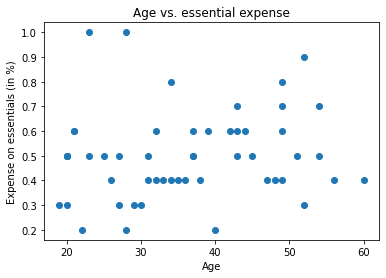

In [ ]:
#data_sc1 = df.iloc[:,[0,7]]     
#print(data_sc1.corr(method ='pearson'))
x = df.iloc[:,[0]]      #selects age column
y1 = df.iloc[:,[7]]      #selects income percentage on essential column
plt.scatter(x,y1)        #scatter plot
plt.xlabel("Age")
plt.ylabel("Expense on essentials (in %)")
plt.title("Age vs. essential expense")
plt.show()

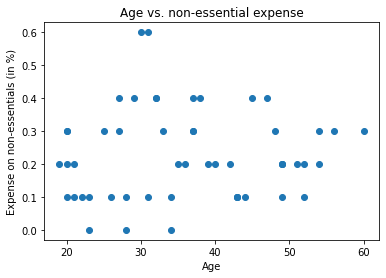

                    age  non-essential
age            1.000000       0.052687
non-essential  0.052687       1.000000


In [ ]:
x = df.iloc[:,[0]]
y2 = df.iloc[:,[8]]
plt.scatter(x,y2)
plt.xlabel("Age")
plt.ylabel("Expense on non-essentials (in %)")
plt.title("Age vs. non-essential expense")
plt.show()
data_sc2 = df.iloc[:,[0,8]]
print(data_sc2.corr(method ='pearson'))

In [ ]:
c1, c2, c3 = 0,0,0
print(len(df.index))
for i in range(len(df.index)):
  temp = df.at[i,'age']
  if (temp< 30 and temp >=15):
    c1= c1+1
  elif (temp< 45 and temp >=30):
     c2=c2+1
  else:
     c3 = c3+1
l1 = [c1,c2,c3]
dict_age = {'Age_category':['15-30','30-45','45-60'],'count':l1}
age_data = pd.DataFrame(dict_age)
print(age_data)
chart = px.bar(age_data,x= 'Age_category',y='count')
#chart.show()


52
  Age_category  count
0        15-30     17
1        30-45     21
2        45-60     14


In [ ]:
df1 = df   #copy of original dataframe
l1 = []
for i in range(len(df1.index)):
  temp = df.at[i,'age']
  if (temp< 30 and temp >=15):
     l1.append('16- 30')
  elif (temp< 45 and temp >=30):
     l1.append('31- 45')
  else:
     l1.append('46- 60')
df1['age_cat'] = l1     #add a new column with age categories
df1['age_cat'].value_counts()

df1.columns = ['age','gender','earning','resident','region','employment','salary','essential','non-essential','savings',
              'discretionary_income','investments_type','savings_type','pandemic_job','incr_expense','decr_expense','exhaustion_savings',
              'last_month_exp_change','Your savings are exhausted easily','Your monthly expenses exceed your monthly income',
              'You are satisfied with your spending pattern','Your monthly expenses match your budgeting plan',
              'income_incr','income_decr','major_purchase']


In [ ]:
df1

,age,gender,earning,resident,region,employment,salary,essential,non-essential,savings,discretionary_income,investments_type,savings_type,pandemic_job,incr_expense,decr_expense,exhaustion_savings,last_month_exp_change,Your savings are exhausted easily,Your monthly expenses exceed your monthly income,You are satisfied with your spending pattern,Your monthly expenses match your budgeting plan,income_incr,income_decr,major_purchase,age_cat
0,56,Male,Yes,Yes,Mumbai city,Own business,below 2.5 lakhs,0.4,0.3,0.3,Save the money,None,"Precious collectibles(Eg.: gold,silver)",Pay cut,Education,Transportation,Less than before,Decrease,Agree,Strongly Agree,Disagree,Strongly Disagree,Save more,Utilize savings,Take loan/Mortgage,46- 60
1,43,Female,Yes,Yes,Mumbai city,Part time employed,below 2.5 lakhs,0.5,0.1,0.4,Save the money,None,Fixed deposits,Pay cut,Others,Recreation,Less than before,Decrease,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Save more,Cut back expenses,Withdraw from savings,31- 45
2,20,Female,Yes,Yes,Mumbai suburban,Self-employed/Freelancer,below 2.5 lakhs,0.5,0.3,0.2,Partially save and partially invest,Mutual Funds,Fixed deposits,Job loss,Insurance/Healthcare,Recreation,More than before,No change,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Save more,Cut back expenses,Withdraw from savings,16- 30
3,32,Female,Yes,Yes,Mumbai city,Full time employed,7.5 - 10 lakhs,0.4,0.4,0.2,Partially save and partially invest,Government securities,Insurance and annuities,Pay cut,Recreation,Rent/Maintenance,More than before,No change,Neutral,Disagree,Neutral,Disagree,Save more,Cut back expenses,Withdraw from savings,31- 45
4,48,Female,Yes,Yes,Mumbai suburban,Full time employed,5 - 7.5 lakhs,0.4,0.3,0.3,Save the money,None,Insurance and annuities,Pay cut,Insurance/Healthcare,Insurance/Healthcare,More than before,No change,Agree,Disagree,Agree,Agree,Save more,Cut back expenses,Take loan/Mortgage,46- 60
5,49,Male,Yes,Yes,Mumbai suburban,Entrepreneur,2.5 - 5 lakhs,0.6,0.2,0.2,Partially save and partially invest,Building portfolios(stock market),"Precious collectibles(Eg.: gold,silver)",Pay cut,Transportation,"Services(househelp, etc.)",More than before,Significant decrease,Agree,Agree,Disagree,Strongly Disagree,Spend more,Cut back expenses,Withdraw from savings,46- 60
6,28,Male,Yes,Yes,Mumbai city,Full time employed,more than 10 lakhs,1.0,0.0,0.0,Partially save and partially invest,Mutual Funds,Other,No change,Groceries,Transportation,Same as before,Increase,Strongly Disagree,Strongly Disagree,Agree,Agree,Save more,Cut back expenses,Withdraw from savings,16- 30
7,60,Male,Yes,Yes,Mumbai suburban,Pensioner,below 2.5 lakhs,0.4,0.3,0.3,Save the money,Mutual Funds,Insurance and annuities,No change,Groceries,Groceries,Less than before,No change,Strongly Agree,Agree,Neutral,Disagree,Save more,Cut back expenses,Withdraw from savings,46- 60
8,21,Male,Yes,Yes,Mumbai suburban,Student,below 2.5 lakhs,0.6,0.2,0.2,Partially save and partially invest,Mutual Funds,Insurance and annuities,"Pay cut,Job loss","Services(househelp, etc.)",Others,More than before,Increase,Disagree,Strongly Disagree,Neutral,Agree,Spend more,Compensate for it by using savings,Withdraw from savings,16- 30
9,54,Male,Yes,Yes,Mumbai suburban,Full time employed,2.5 - 5 lakhs,0.5,0.2,0.3,Save the money,None,Fixed deposits,No change,Groceries,Transportation,Same as before,No change,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Save more,Cut back expenses,Withdraw from savings,46- 60


8.493036568694464 0.3868473023649339 8
variable are independent


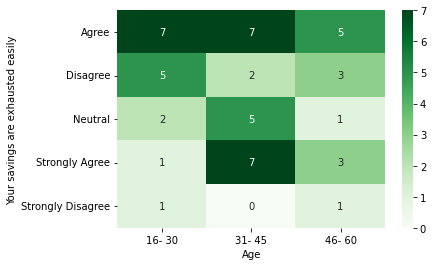

In [ ]:
#Age category vs. statement 'Your savings are exhausted easily'
contingency_tab = pd.crosstab(df1['Your savings are exhausted easily'],df1['Age'])   #selects values
sns.heatmap(contingency_tab, cmap ='Greens', annot = True)       #heatmaps 
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')

11.70423698325484 0.1648959308500343 8
variable are independent


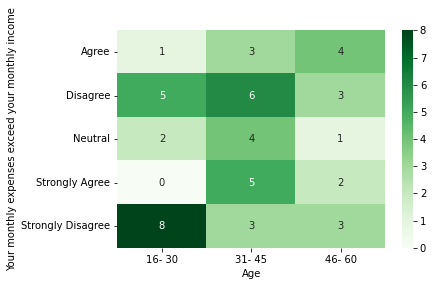

In [ ]:
contingency_tab = pd.crosstab(df1['Your monthly expenses exceed your monthly income'],df1['Age'])
sns.heatmap(contingency_tab, cmap ='Greens', annot = True);
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')

4.962662712143682 0.7615592466512481 8
variable are independent


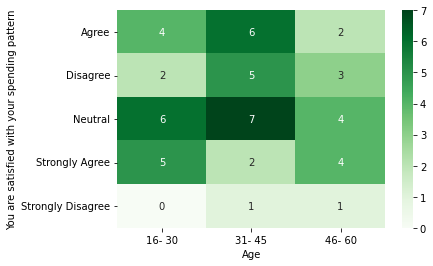

In [ ]:
#Age category vs. statement 'You are satisfied with your spending pattern'
contingency_tab = pd.crosstab(df1['You are satisfied with your spending pattern'],df1['Age'])
sns.heatmap(contingency_tab, cmap ='Greens', annot = True);
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')

5.604024943310658 0.6914896582856528 8
variable are independent


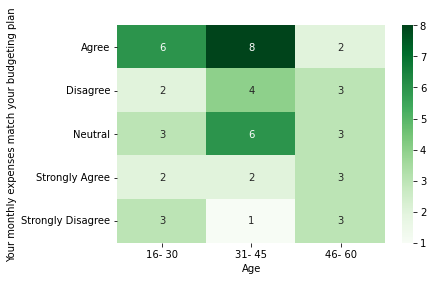

In [ ]:
#Age category vs. statement 'Your monthly expenses match your budgeting plan'
contingency_tab = pd.crosstab(df1['Your monthly expenses match your budgeting plan'],df1['Age'])
sns.heatmap(contingency_tab, cmap ='Greens', annot = True);
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')

In [ ]:
df1.index = pd.CategoricalIndex(df1.index, categories= ["Strongly Agree","Agree","Neutral","Disagree","Strongly Disagree"])
df1.sort_index(level=0, inplace=True)
ax = sns.heatmap(df1, annot=True, fmt="d", linewidths=0.4, cmap="YlOrRd")

plt.show()


In [ ]:
Opinion = sns.load_dataset("age_data")
Opinion = sns.pivot("Age_category","count")
ax= sns.heatmaps(Opinion)

22.3204554947976 0.13314257870491786 16
variable are independent


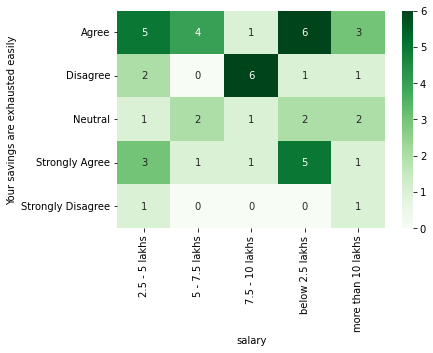

In [ ]:
contingency_tab = pd.crosstab(df1['Your savings are exhausted easily'],df1['salary'])
sns.heatmap(contingency_tab, cmap ='Greens', annot = True);
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')

13.919005102040817 0.6047478316864352 16
variable are independent


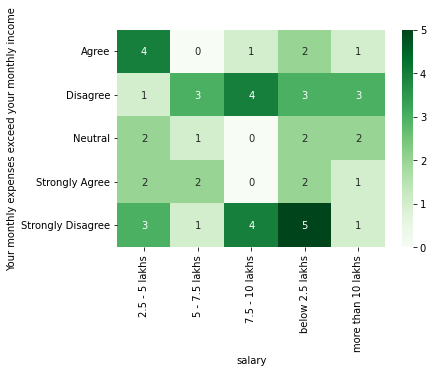

In [ ]:
contingency_tab = pd.crosstab(df1['Your monthly expenses exceed your monthly income'],df1['salary'])
sns.heatmap(contingency_tab, cmap ='Greens', annot = True);
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')

28.724963500551738 0.025858000929732314 16
variable are dependent


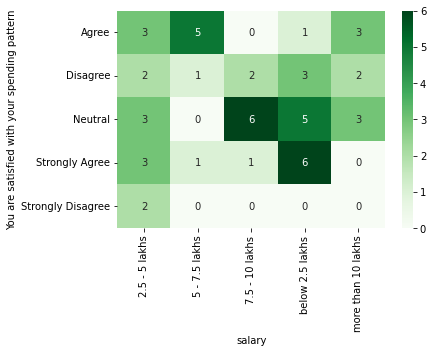

In [ ]:
contingency_tab = pd.crosstab(df1['You are satisfied with your spending pattern'],df1['salary'])
sns.heatmap(contingency_tab, cmap ='Greens', annot = True);
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')

11.779856386999242 0.758990033467614 16
variable are independent


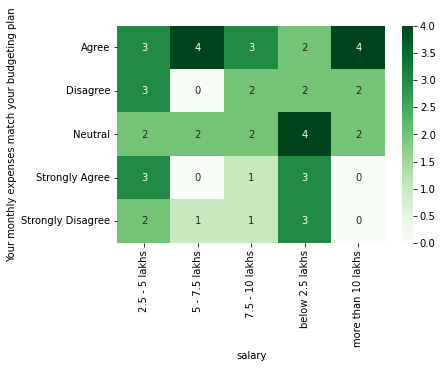

In [ ]:
contingency_tab = pd.crosstab(df1['Your monthly expenses match your budgeting plan'],df1['salary'])
sns.heatmap(contingency_tab, cmap ='Greens', annot = True);
from scipy.stats import chi2_contingency
stat, p, dof,expected = chi2_contingency(contingency_tab)
print(stat,p,dof)
expected
alpha = 0.05
if p > 0.05:
    print('variable are independent')
else:
    print('variable are dependent')